In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as plt

In [2]:
# Function to read and transpose data
def read_and_transpose(filename):
    df = pd.read_csv(filename)
    df_years = df.set_index('country').T
    df_countries = df.set_index('year').T
    return df_years, df_countries

# Read and transpose data
df_years, df_countries = read_and_transpose('healthcare-dataset-stroke-data.csv')

In [3]:
health.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
health.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
health.drop('id', inplace=True, axis=1)

In [7]:
health.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
health.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [10]:
health.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
health['bmi'].mean()

28.893236911794673

In [12]:
mean = health["bmi"].mean()

health['bmi'].replace(np.nan, mean ,inplace=True)

In [13]:
health.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
cat_features = health[["gender","ever_married","work_type","smoking_status","Residence_type"]]

numeric_features = health[["age","hypertension", "heart_disease", "avg_glucose_level", "bmi", "stroke"]]


numeric_features.head()

cat_features.head()


,gender,ever_married,work_type,smoking_status,Residence_type
0,Male,Yes,Private,formerly smoked,Urban
1,Female,Yes,Self-employed,never smoked,Rural
2,Male,Yes,Private,never smoked,Rural
3,Female,Yes,Private,smokes,Urban
4,Female,Yes,Self-employed,never smoked,Rural


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'stroke'}>]], dtype=object)

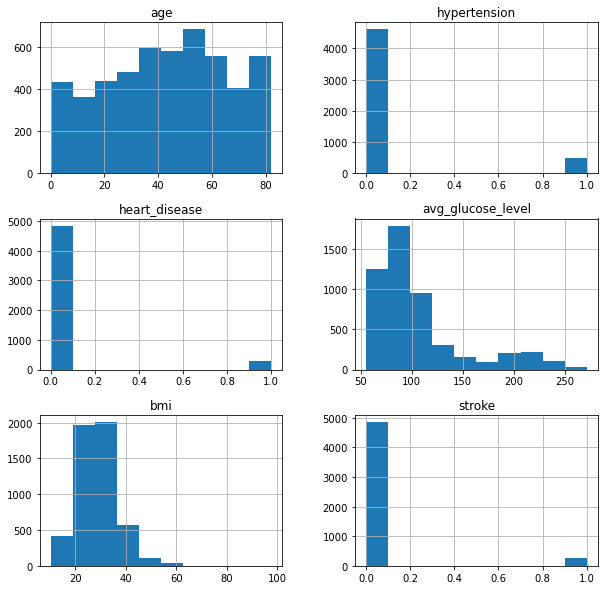

In [15]:
numeric_features.hist(figsize=[10,10])

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

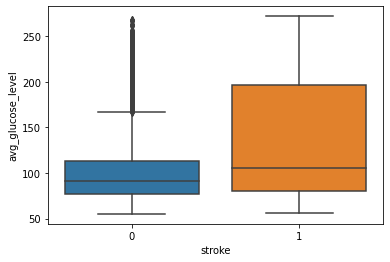

In [16]:
sns.boxplot(x='stroke',y='avg_glucose_level',data=health)

<AxesSubplot:xlabel='stroke', ylabel='age'>

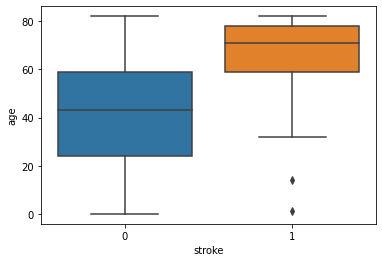

In [17]:
sns.boxplot(x='stroke',y='age',data=health)


<AxesSubplot:xlabel='stroke', ylabel='bmi'>

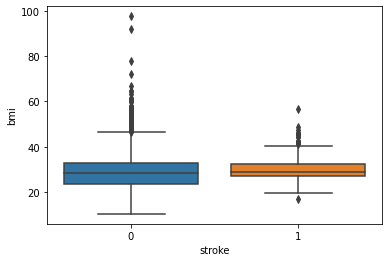

In [18]:
sns.boxplot(x='stroke',y='bmi',data=health)

<AxesSubplot:xlabel='stroke', ylabel='hypertension'>

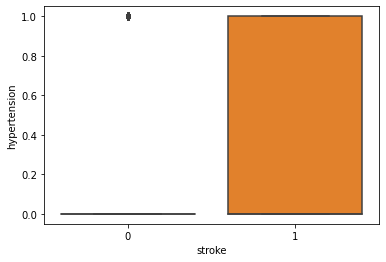

In [19]:
sns.boxplot(x='stroke',y='hypertension',data=health)

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mahes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


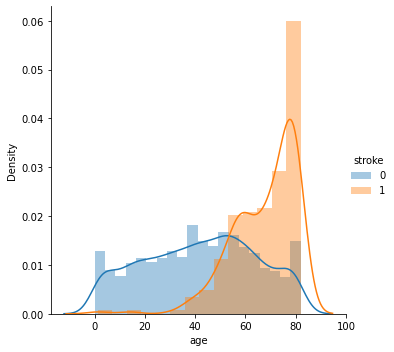

In [20]:
sns.FacetGrid(health,hue="stroke",height = 5).map(sns.distplot,"age"). add_legend()

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mahes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


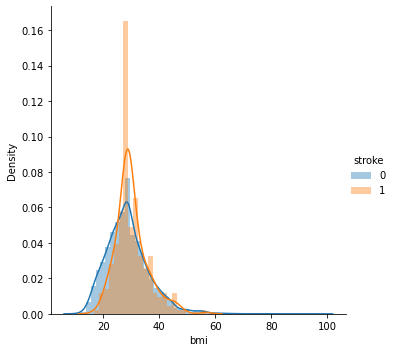

In [21]:
sns.FacetGrid(health,hue="stroke",height = 5).map(sns.distplot,"bmi"). add_legend()

In [22]:
counts = cat_features["gender"].value_counts()
percent100 = cat_features["gender"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
stroke_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(stroke_conditions)


counts = cat_features["ever_married"].value_counts()
percent100 = cat_features["ever_married"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
stroke_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(stroke_conditions)


counts = cat_features["work_type"].value_counts()
percent100 = cat_features["work_type"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
stroke_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(stroke_conditions)


counts = cat_features["Residence_type"].value_counts()
percent100 = cat_features["Residence_type"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
stroke_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})

print(stroke_conditions)

        counts Percent
Female    2994   58.6%
Male      2115   41.4%
Other        1    0.0%
     counts Percent
Yes    3353   65.6%
No     1757   34.4%
               counts Percent
Private          2925   57.2%
Self-employed     819   16.0%
children          687   13.4%
Govt_job          657   12.9%
Never_worked       22    0.4%
       counts Percent
Urban    2596   50.8%
Rural    2514   49.2%


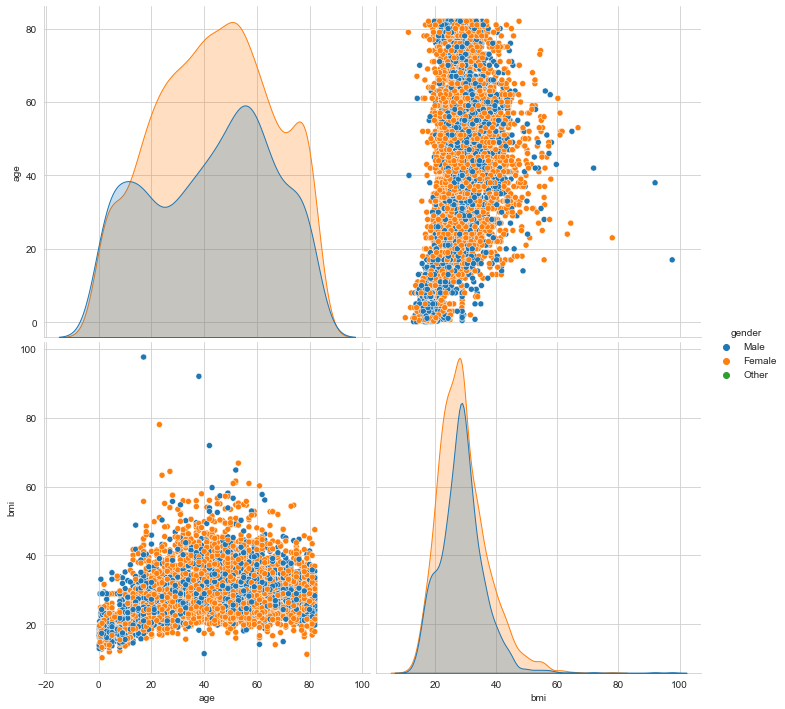

In [23]:
numeric_features = health[["age","gender","bmi"]]

sns.set_style("whitegrid")
sns.pairplot(numeric_features, hue = "gender", height = 5)

<AxesSubplot:xlabel='smoking_status'>

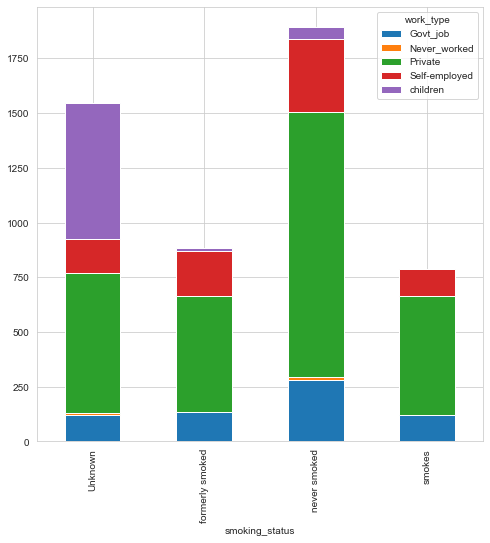

In [24]:
smoke_vs_work_type = pd.crosstab(index=health["smoking_status"], columns=health["work_type"]) 
smoke_vs_work_type.plot(kind="bar", figsize=(8,8),stacked=True)

<AxesSubplot:>

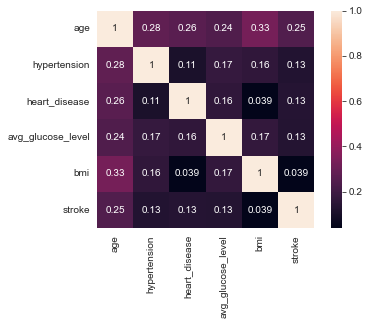

In [25]:
sns.heatmap(health.corr(), annot = True,square=True)